In this script I will make the first part of the analysis, which is focused to validate the observations. Analysis based on the paper 'Organic matter in tidal estuaries', Middelburg & Herman (2007).

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.spatial import Voronoi, voronoi_plot_2d
import smopy
import matplotlib
import glob
import missingno

import plotly
import plotly.io as pio
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.express as px

In [2]:
data= pd.read_csv('../2_data/all_variables/mudai_new1.csv')
data.time = pd.to_datetime(data.time)

In [3]:
data.head()

time  spm_in_g/l      Code  total_salinity_surface_water  \
0 1996-01-09    0.080372  BLAUWSOT                     24.627674   
1 1996-01-10    0.079326  BLAUWSOT                     24.820465   
2 1996-01-11    0.078279  BLAUWSOT                     25.013256   
3 1996-01-12    0.077233  BLAUWSOT                     25.206047   
4 1996-01-13    0.076186  BLAUWSOT                     25.398837   

   total_transparency_surface_water       DOC       POC       TKN  \
0                          3.007263  0.002129  0.003402  0.002042   
1                          3.007470  0.002126  0.003352  0.002042   
2                          3.007678  0.002124  0.003301  0.002043   
3                          3.007885  0.002122  0.003251  0.002043   
4                          3.008093  0.002119  0.003201  0.002044   

   oxygen_concentration_surface_water  \
0                            0.009594   
1                            0.009575   
2                            0.009556   
3                            0.009537   
4                            0.009517   

   total_phosphorus_concentration_surface_water     ...      autumn  spring  \
0                                      0.000168     ...           0       0   
1                                      0.000168     ...           0       0   
2                                      0.000168     ...           0       0   
3                                      0.000168     ...           0       0   
4                                      0.000169     ...           0       0   

   summer  winter  year  ameland_inlet  eems-dollard_inlet  frisian_inlet  \
0       0       1  1996              0                   0              0   
1       0       1  1996              0                   0              0   
2       0       1  1996              0                   0              0   
3       0       1  1996              0                   0              0   
4       0       1  1996              0                   0              0   

   texel_inlet  vlie_inlet  
0            0           1  
1            0           1  
2            0           1  
3            0           1  
4            0           1  

[5 rows x 32 columns]

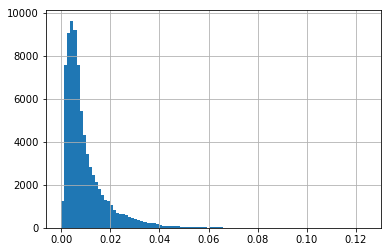

In [5]:
data['chlorophyll-a_concentration_surface_water'].hist(bins=100)

1. How is the distribution of SMP in different stations? Are they statistically different? According to the paper (See figure 2 and Sect. 3.1), the regions with high turbidity will have on average a higher spm value. One example of them is Eems.

In [6]:
spm_pivot = pd.pivot_table(data, index= 'time', columns= 'Code', values= 'spm_in_g/l')
fig= px.box(data, x= 'Code', y= 'spm_in_g/l')
fig.show()

In [7]:
spm_pivot.describe()

Code      BLAUWSOT    BOCHTVWTM      BOOMKDP      DANTZGT      DOOVBWT  \
count  4721.000000  8011.000000  3924.000000  8009.000000  8015.000000   
mean      0.080000     0.166204     0.031444     0.142662     0.028582   
std       0.052632     0.097032     0.029512     0.109015     0.022675   
min       0.012000     0.016000     0.001820     0.009300     0.003760   
25%       0.042643     0.097197     0.014115     0.073800     0.014338   
50%       0.069277     0.138547     0.022239     0.111859     0.022085   
75%       0.098690     0.214872     0.035444     0.173943     0.034478   
max       0.337000     0.843000     0.215000     0.860000     0.251000   

Code    HARLGVHVN      HUIBGOT   LAUWOHVMD      MARSDND     ROTTMPT3  \
count  569.000000  8011.000000  541.000000  8015.000000  7542.000000   
mean     0.094118     0.020046    0.083975     0.030537     0.027750   
std      0.032849     0.033477    0.045768     0.024174     0.021477   
min      0.027000     0.001000    0.018000     0.003000     0.003000   
25%      0.064984     0.008250    0.044819     0.014571     0.013494   
50%      0.095172     0.014786    0.070246     0.025000     0.020582   
75%      0.126157     0.024131    0.122780     0.038882     0.034324   
max      0.141000     0.710000    0.200000     0.298000     0.130000   

Code       TERSLG4       VLIESM   ZOUTKPLZGT    ZUIDOLWOT  
count  3998.000000  8012.000000  5090.000000  5089.000000  
mean      0.011170     0.027647     0.076718     0.073337  
std       0.009497     0.019735     0.046088     0.041077  
min       0.001000     0.003000     0.006000     0.005000  
25%       0.004319     0.013355     0.044735     0.045290  
50%       0.007979     0.021775     0.064250     0.065913  
75%       0.015000     0.036765     0.097708     0.091786  
max       0.057000     0.120000     0.325000     0.390000

Effectively, the station BOCHTVWTM has the higest smp content on average, it is located in the Eems inlet. The following map shows the spm composition over location.

In [8]:
locs_spm= pd.read_excel('../2_data/rws_data/metadata/spm_stations.xlsx', index= False)
median_spm = data.groupby('Code')['spm_in_g/l'].median().reset_index()
median_spm = pd.merge(locs_spm, median_spm, on='Code')

In [9]:
# Why are less stations in the final data?
# Ans: becasue there were stations for which we did not have any other RWS data,
# therefore, when removing missing values during the peprocessing, those stations
# were gone.
locs_spm.shape[0], data.Code.nunique()

(24, 14)

In [49]:
mapbox_access_token = 'pk.eyJ1IjoiY2FybWVuYWRyaWFuYW1hcnRpbmV6YmFyYm9zYSIsImEiOiJjazJldmtwZW8wY3B2M2hyYXByYTJoaXNwIn0.5rF0jY00I-aFlAVhxDu8Jg'
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(median_spm, 
                        lat="y_wgs", 
                        lon="x_wgs",     
                        color="spm_in_g/l",
                        text= 'Code',
                        color_continuous_scale=px.colors.sequential.turbid, 
                        size_max=25, 
                        zoom=6
                        )

fig.update_traces(textposition='top center')

fig.update_layout(
    height=600,
    width = 1000,
    title_text= 'Suspended particle matter in the Wadden Sea'
)

fig.show()

2. According to the paper, concentrations of POC are higher in turbid estuaries (more material). How is the distribution of POC and DOC in different stations? Are they statistically different?

In [11]:
carbon_conc= pd.merge(data.groupby('Code')['POC'].median().reset_index(),
                      data.groupby('Code')['DOC'].median().reset_index(),
                      on= 'Code')

carbon_conc = carbon_conc.sort_values(by= 'POC', ascending= False)

In [12]:
fig = go.Figure(data= [go.Bar(x=carbon_conc.Code.values, y= carbon_conc.POC.values, name= "POC"),
                       go.Bar(x=carbon_conc.Code.values, y= carbon_conc.DOC.values, name= "DOC")])
fig.show()

In [13]:
# DOC is related to fresh water!!!! SO DOC vs. Salinity is a sort of line with negative slope:
# The smaller the salinity, the higher ther DOC. BETTER TO USE DOC AS PREDICTOR

# POC is related to turbidity somehow, 
#but the relationship is more complicated due to the organix matter that is present in the water.
# BETTER TO USE POC_fraction AS PREDICTOR

# aCCORDING TO THIS, THEREFORE, MAYBE THE STATION bochtvwtm has a higer DOC because the Eems river is nearby or a fresh water
# reservoir is closeby.
carbon_conc1 = pd.merge(locs_spm, carbon_conc, on= 'Code')
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(carbon_conc1, 
                        lat="y_wgs", 
                        lon="x_wgs",     
                        color="POC",
                        size= "DOC", 
                        text= 'Code',
                        color_continuous_scale=px.colors.sequential.turbid, size_max=15, zoom=8
                        )

fig.update_traces(textposition='top center')

fig.update_layout(
    height=600,
    title_text= 'POC and DOC in the Wadden Sea'
)

fig.show()


The higher turbidity, the higher the spm and the higher the POC. This can be seen is the stations: <br>
BOCHTVWTM, HARLGVHVN and DANTZGT. <br>
For the stations: BOCHTVWTM, HARLGVHVN DOC is also high, beacuse they are close to fresh water reservoirs. So, yes,
concentration of POC in turbid zonesis higher. 

3. Get a dataset with averaged values per station and year

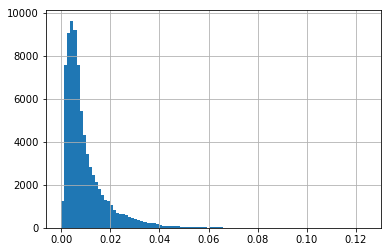

In [14]:
data['chlorophyll-a_concentration_surface_water'].hist(bins=100)

In [15]:
sal= data.groupby(['Code', data.time.dt.year]).total_salinity_surface_water.mean().reset_index()
P = data.groupby(['Code', data.time.dt.year]).total_phosphorus_concentration_surface_water.mean().reset_index()
spm= data.groupby(['Code', data.time.dt.year])['spm_in_g/l'].mean().reset_index()
chl = data.groupby(['Code', data.time.dt.year])['chlorophyll-a_concentration_surface_water'].mean().reset_index()
DOC= data.groupby(['Code', data.time.dt.year]).DOC.mean().reset_index()
noverc = data.groupby(['Code', data.time.dt.year])['TOC/N'].mean().reset_index()
surge = data.groupby(['Code', data.time.dt.year])['surge'].mean().reset_index()

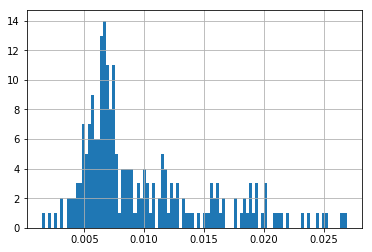

In [16]:
chl['chlorophyll-a_concentration_surface_water'].hist(bins=100)

In [17]:
data_avg = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(spm, sal,  on= ['Code', 'time']),
                     P,  on= ['Code', 'time']),
                     chl, on= ['Code', 'time']),
                     DOC, on=['Code', 'time']),
                     noverc, on=['Code', 'time']),
                     surge, on= ['Code', 'time'])

In [18]:
# add inlet
inlet = []
for i in data_avg['Code']:
    if((i=='DOOVBOT')^(i=='DOOVBMDN')^(i=='WESTKSRK')^(i=='DOOVBWT')^(i=='MALZN')^(i=='MARSDND')^(i=='HUISDNBSD')^(i=='KOOGBSD')^(i=='HARLGVHVN')^(i=='BOONTNMPL')^(i=='HARLGHVMWT')):
        inlet.append('texel_inlet')
    if((i=='ZUIDOLWOT')^(i=='ROTTMPT3')^(i=='HUIBGOT')^(i=='BOCHTVWTM')):
        inlet.append('eems-dollard_inlet')
    if((i=='BLAUWSOT')^(i=='VLIESM')^(i=='BOOMKDP')^(i=='TERSLG4')):
        inlet.append('vlie_inlet')
    if(i== 'DANTZGT'):
        inlet.append('ameland_inlet')
    if((i=='OORT')^(i=='LAUWOHVMD')^(i=='ZOUTKPLG')^(i=='ZOUTKPLZGT')):
        inlet.append('frisian_inlet')
    
data_avg['tidal_basin']= inlet 

In [19]:
data_avg.head()

Code  time  spm_in_g/l  total_salinity_surface_water  \
0  BLAUWSOT  1996    0.072907                     27.421353   
1  BLAUWSOT  1997    0.085812                     26.514637   
2  BLAUWSOT  1998    0.077001                     23.787473   
3  BLAUWSOT  1999    0.064529                     23.502684   
4  BLAUWSOT  2000    0.074595                     23.717416   

   total_phosphorus_concentration_surface_water  \
0                                      0.000181   
1                                      0.000131   
2                                      0.000114   
3                                      0.000108   
4                                      0.000191   

   chlorophyll-a_concentration_surface_water       DOC      TOC/N     surge  \
0                                   0.023150  0.002437   8.096714 -0.055770   
1                                   0.020001  0.002568  13.042531 -0.028090   
2                                   0.007451  0.003255  15.465373  0.049674   
3                                   0.006853  0.003163  15.197256  0.045025   
4                                   0.006254  0.002808  14.188855  0.037836   

  tidal_basin  
0  vlie_inlet  
1  vlie_inlet  
2  vlie_inlet  
3  vlie_inlet  
4  vlie_inlet

3. DOC concentrations are almost uniform over almost the whole salinity range of Eems. How is DOC vs. salinity over all the stations of WS?

In [20]:
# Plot of one station per tidal inlet
fig= px.scatter(data_avg, 
                x= 'total_salinity_surface_water', 
                y= 'DOC', facet_col= 'tidal_basin')
fig.show()

Indeed you do not see an aparent relationship of DOC and salinity. However, for rivers you see a negative slope. 

4. See other relationships

In [21]:
spmP = pd.merge(data.groupby([data.time.dt.year]).total_phosphorus_concentration_surface_water.mean().reset_index(),
         data.groupby([data.time.dt.year])['spm_in_g/l'].mean().reset_index(),
         on = 'time'
        )

In [22]:
fig = px.scatter(data_avg, x= 'total_phosphorus_concentration_surface_water', y="spm_in_g/l", 
                 color= 'Code',
                 color_discrete_sequence = px.colors.qualitative.Dark24,
                 trendline= 'ols',
                 width=600, height=600
                )
fig.show()

In [23]:
fig = px.scatter(data_avg, x= 'total_salinity_surface_water', y="spm_in_g/l", 
                 color= 'Code',
                 color_discrete_sequence = px.colors.qualitative.Dark24,
                 width=600, height=600,
                 trendline= 'ols'
                )
fig.show()

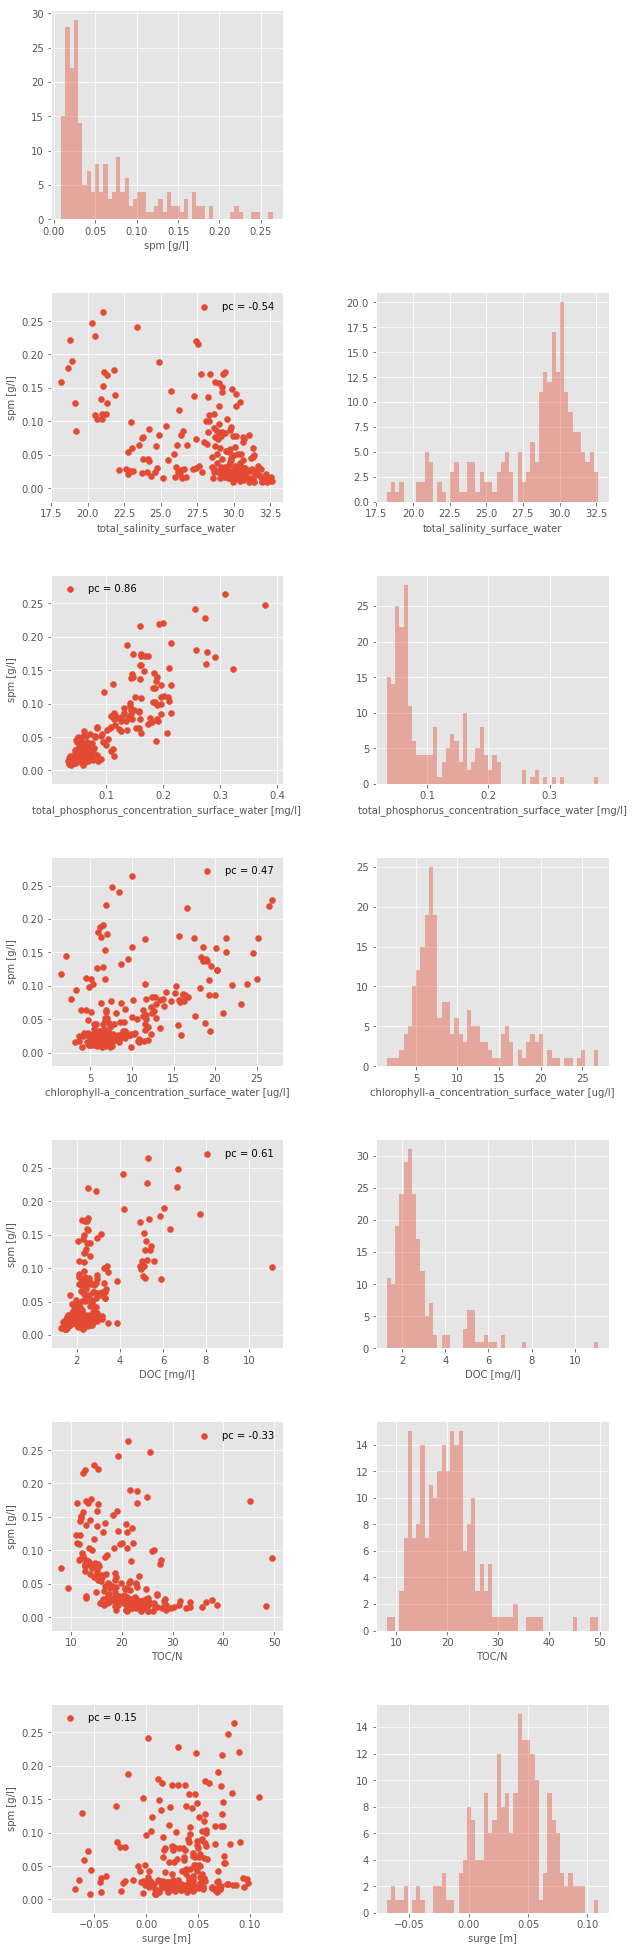

In [45]:
# Make the plot for the final report
cols = ['total_salinity_surface_water',
       'total_phosphorus_concentration_surface_water',
       'chlorophyll-a_concentration_surface_water', 'DOC', 'TOC/N', 'surge']

plt.style.use('ggplot')

bins= 50

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
    
fig, ax = plt.subplots(7, 2, figsize= (10, 35))
plt.subplots_adjust(wspace= 0.4, hspace= 0.35)

sns.distplot(data_avg['spm_in_g/l'], ax= ax[0,0], bins= bins, kde= False)
ax[0,0].set_xlabel('spm [g/l]', fontsize= 10)

ax[0,1].patch.set_visible(False)
ax[0,1].axes.get_xaxis().set_visible(False)
ax[0,1].axes.get_yaxis().set_visible(False)

# salinity
pc = np.corrcoef(data_avg[cols[0]], data_avg['spm_in_g/l'])[0][1]
ax[1,0].scatter(data_avg[cols[0]], data_avg['spm_in_g/l'], label = 'pc = %.2f'%pc )
ax[1,0].set_ylabel('spm [g/l]', fontsize= 10)
ax[1,0].set_xlabel(cols[0], fontsize= 10)
ax[1,0].legend(loc='best', scatterpoints= None, frameon= False)

sns.distplot(data_avg[cols[0]], ax= ax[1,1], bins= bins, kde= False)
ax[1,1].set_xlabel(cols[0], fontsize= 10)

# P
pc = np.corrcoef(data_avg[cols[1]]*1000, data_avg['spm_in_g/l'])[0][1]
ax[2,0].scatter(data_avg[cols[1]]*1000, data_avg['spm_in_g/l'], label = 'pc = %.2f'%pc )
ax[2,0].set_ylabel('spm [g/l]', fontsize= 10)
ax[2,0].set_xlabel('%s [mg/l]'%cols[1], fontsize= 10)
ax[2,0].legend(loc='best', scatterpoints= None, frameon= False)

sns.distplot(data_avg[cols[1]]*1000, ax= ax[2,1], bins= bins, kde= False)
ax[2,1].set_xlabel('%s [mg/l]'%cols[1], fontsize= 10)

# chl
pc = np.corrcoef(data_avg[cols[2]]*1000, data_avg['spm_in_g/l'])[0][1]
ax[3,0].scatter(data_avg[cols[2]]*1000, data_avg['spm_in_g/l'], label = 'pc = %.2f'%pc )
ax[3,0].set_ylabel('spm [g/l]', fontsize= 10)
ax[3,0].set_xlabel('%s [ug/l]'%cols[2], fontsize= 10)
ax[3,0].legend(loc='best', scatterpoints= None, frameon= False)

sns.distplot(data_avg[cols[2]]*1000, ax= ax[3,1], bins= bins, kde= False)
ax[3,1].set_xlabel('%s [ug/l]'%cols[2], fontsize= 10)

# DOC
pc = np.corrcoef(data_avg[cols[3]]*1000, data_avg['spm_in_g/l'])[0][1]
ax[4,0].scatter(data_avg[cols[3]]*1000, data_avg['spm_in_g/l'], label = 'pc = %.2f'%pc )
ax[4,0].set_ylabel('spm [g/l]', fontsize= 10)
ax[4,0].set_xlabel( '%s [mg/l]'%cols[3], fontsize= 10)
ax[4,0].legend(loc='best', scatterpoints= None, frameon= False)

sns.distplot(data_avg[cols[3]]*1000, ax= ax[4,1], bins= bins, kde= False)
ax[4,1].set_xlabel('%s [mg/l]'%cols[3], fontsize= 10)

# C/N
pc = np.corrcoef(data_avg[cols[4]], data_avg['spm_in_g/l'])[0][1]
ax[5,0].scatter(data_avg[cols[4]], data_avg['spm_in_g/l'], label = 'pc = %.2f'%pc )
ax[5,0].set_ylabel('spm [g/l]', fontsize= 10)
ax[5,0].set_xlabel( '%s'%cols[4], fontsize= 10)
ax[5,0].legend(loc='best', scatterpoints= None, frameon= False)

sns.distplot(data_avg[cols[4]], ax= ax[5,1], bins= bins, kde= False)
ax[5,1].set_xlabel('%s'%cols[4], fontsize= 10)

# Surge
pc = np.corrcoef(data_avg[cols[5]], data_avg['spm_in_g/l'])[0][1]
ax[6,0].scatter(data_avg[cols[5]], data_avg['spm_in_g/l'], label = 'pc = %.2f'%pc )
ax[6,0].set_ylabel('spm [g/l]', fontsize= 10)
ax[6,0].set_xlabel( '%s [m]'%cols[5], fontsize= 10)
ax[6,0].legend(loc='best', scatterpoints= None, frameon= False)

sns.distplot(data_avg[cols[5]], ax= ax[6,1], bins= bins, kde= False)
ax[6,1].set_xlabel('%s [m]'%cols[5], fontsize= 10);

plt.savefig('../4_plots/scatter_plot.png', bbox_inches='tight')


# K value

Naive approach: make a linearization with a logarithm

In [25]:
POC_fraction= data.groupby(['Code', data.time.dt.year]).POC_fraction.mean().reset_index()

In [26]:
pocspm = pd.merge(spm, POC_fraction, on= ['time', 'Code'])

In [27]:
pocspm['spm_in_mg/l'] =pocspm['spm_in_g/l']*1000
pocspm['logspm'] = np.log(pocspm['spm_in_mg/l'])
pocspm['log_POC_fraction'] = np.log(pocspm['POC_fraction'])

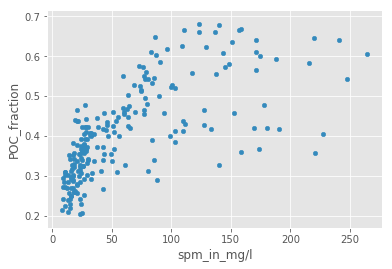

In [28]:
pocspm.plot(kind= 'scatter', x= 'spm_in_mg/l', y= 'POC_fraction')

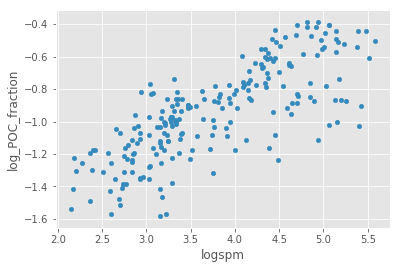

In [29]:
pocspm.plot(kind= 'scatter', x= 'logspm', y= 'log_POC_fraction')

In [30]:
from pydsc.plotting import get_lin_model, get_CI_and_PI_lin_model

In [31]:
ols = get_lin_model(pocspm['log_POC_fraction'], pocspm[['logspm']])
x, y, ci, pi = get_CI_and_PI_lin_model(pocspm['log_POC_fraction'], pocspm[['logspm']])

In [32]:
print('K value is:', ols.coef_[0])

K value is: 0.2561334307211473


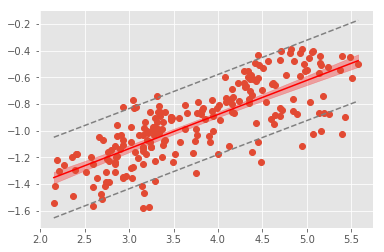

In [33]:
m, b= ols.coef_, ols.intercept_

fig= plt.figure()
ax= fig.add_subplot(111)
ax.plot(pocspm['logspm'], pocspm['log_POC_fraction'], 'o')
# 95% CI and PI
ax.plot(x, y, 'r-', label= 'y= %.2fx + %.2f'%(m[0], b))
ax.fill_between(x, y+ci, y-ci, color='red', alpha= 0.3, edgecolor='')
ax.plot(x, y-pi, '--', color='0.5')
ax.plot(x, y+pi, '--', color='0.5')


Optimization with scipy

In [34]:
from scipy.optimize import curve_fit

def func(x, k):
    return x/(x+k)

popt, pcov = curve_fit(func, pocspm['spm_in_mg/l'], pocspm['POC_fraction'])

print('The K value is: %g +/- %g'%(popt[0], pcov[0]))

The K value is: 69.8363 +/- 7.85882


In [35]:
spmt = np.linspace(0, 300, 600)

poctinf = spmt/(spmt+ (popt[0]-pcov[0]))
poctmed = spmt/(spmt+ popt[0])
poctsup = spmt/(spmt+ (popt[0]+pcov[0]))

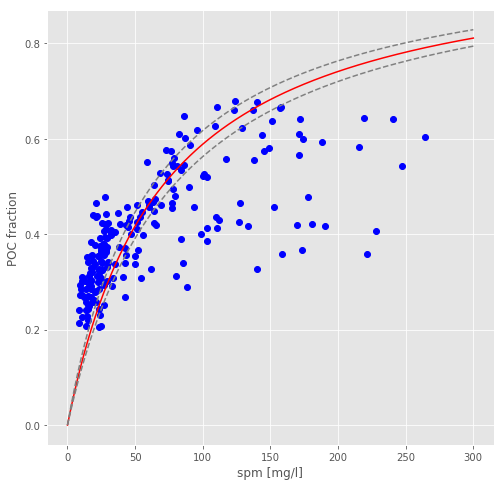

In [46]:
fig= plt.figure(figsize=(8,8))
ax= fig.add_subplot(111)
ax.plot(pocspm['spm_in_mg/l'], pocspm['POC_fraction'], 'bo')
# 95% CI and PI
ax.plot(spmt, poctmed, 'r-', label= 'y= %.2fx + %.2f'%(m[0], b))
#ax.fill_between(x, y+ci, y-ci, color='red', alpha= 0.3, edgecolor='')
ax.plot(spmt, poctinf, '--', color='0.5') 
ax.plot(spmt, poctsup, '--', color='0.5')
ax.set_xlabel('spm [mg/l]')
ax.set_ylabel('POC fraction')
plt.savefig('../4_plots/POC_fraction.png', bbox_inches='tight')